# Importing

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\rubix\Downloads\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Coffee_Health_Cleaned.csv'), index_col = False)

In [4]:
df

ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0         1   40    Male  Germany            3.5        328.1          7.5   
1         2   33    Male  Germany            1.0         94.1          6.2   
2         3   42    Male   Brazil            5.3        503.7          5.9   
3         4   53    Male  Germany            2.6        249.2          7.3   
4         5   32  Female    Spain            3.1        298.0          5.3   
...     ...  ...     ...      ...            ...          ...          ...   
9995   9996   50  Female    Japan            2.1        199.8          6.0   
9996   9997   18  Female       UK            3.4        319.2          5.8   
9997   9998   26    Male    China            1.6        153.4          7.1   
9998   9999   40  Female  Finland            3.4        327.1          7.0   
9999  10000   42  Female   Brazil            2.9        277.5          6.4   

     Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0             Good  24.9          78          Low                     14.5   
1             Good  20.0          67          Low                     11.0   
2             Fair  22.7          59       Medium                     11.2   
3             Good  24.7          71          Low                      6.6   
4             Fair  24.1          76       Medium                      8.5   
...            ...   ...         ...          ...                      ...   
9995          Fair  30.5          50       Medium                     10.1   
9996          Fair  19.1          71       Medium                     11.6   
9997          Good  25.1          66          Low                     13.7   
9998          Good  19.3          80          Low                      0.1   
9999          Good  28.1          72          Low                      9.8   

     Health_Issues  Occupation  Smoking  Alcohol_Consumption  
0             Zero       Other    False                False  
1             Zero     Service    False                False  
2             Mild      Office    False                False  
3             Mild       Other    False                False  
4             Mild     Student    False                 True  
...            ...         ...      ...                  ...  
9995      Moderate  Healthcare    False                 True  
9996          Mild     Service    False                False  
9997          Zero     Student     True                 True  
9998          Zero     Student    False                False  
9999          Zero     Student     True                False  

[10000 rows x 16 columns]

In [5]:
plt.rcParams["figure.dpi"] = 300 # Default DPI

# Useful Variables

All of the variables except for ID could be used in some fashion (ID is acting like a "name" column to identify certain people and is not strictly necessary). Sleep quality, stress level, and health issues might want to be changed to numbers for further analysis.

In [6]:
# We can drop the ID column visually to see if we want to change that

df.drop(columns = ['ID'])

Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0      40    Male  Germany            3.5        328.1          7.5   
1      33    Male  Germany            1.0         94.1          6.2   
2      42    Male   Brazil            5.3        503.7          5.9   
3      53    Male  Germany            2.6        249.2          7.3   
4      32  Female    Spain            3.1        298.0          5.3   
...   ...     ...      ...            ...          ...          ...   
9995   50  Female    Japan            2.1        199.8          6.0   
9996   18  Female       UK            3.4        319.2          5.8   
9997   26    Male    China            1.6        153.4          7.1   
9998   40  Female  Finland            3.4        327.1          7.0   
9999   42  Female   Brazil            2.9        277.5          6.4   

     Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0             Good  24.9          78          Low                     14.5   
1             Good  20.0          67          Low                     11.0   
2             Fair  22.7          59       Medium                     11.2   
3             Good  24.7          71          Low                      6.6   
4             Fair  24.1          76       Medium                      8.5   
...            ...   ...         ...          ...                      ...   
9995          Fair  30.5          50       Medium                     10.1   
9996          Fair  19.1          71       Medium                     11.6   
9997          Good  25.1          66          Low                     13.7   
9998          Good  19.3          80          Low                      0.1   
9999          Good  28.1          72          Low                      9.8   

     Health_Issues  Occupation  Smoking  Alcohol_Consumption  
0             Zero       Other    False                False  
1             Zero     Service    False                False  
2             Mild      Office    False                False  
3             Mild       Other    False                False  
4             Mild     Student    False                 True  
...            ...         ...      ...                  ...  
9995      Moderate  Healthcare    False                 True  
9996          Mild     Service    False                False  
9997          Zero     Student     True                 True  
9998          Zero     Student    False                False  
9999          Zero     Student     True                False  

[10000 rows x 15 columns]

In [7]:
# Let's go ahead and drop it

df = df.drop(columns = ['ID'])

# Heatmap

In [8]:
# Need a dataframe containing only numbers.

heat_df = df.corr(numeric_only=True)

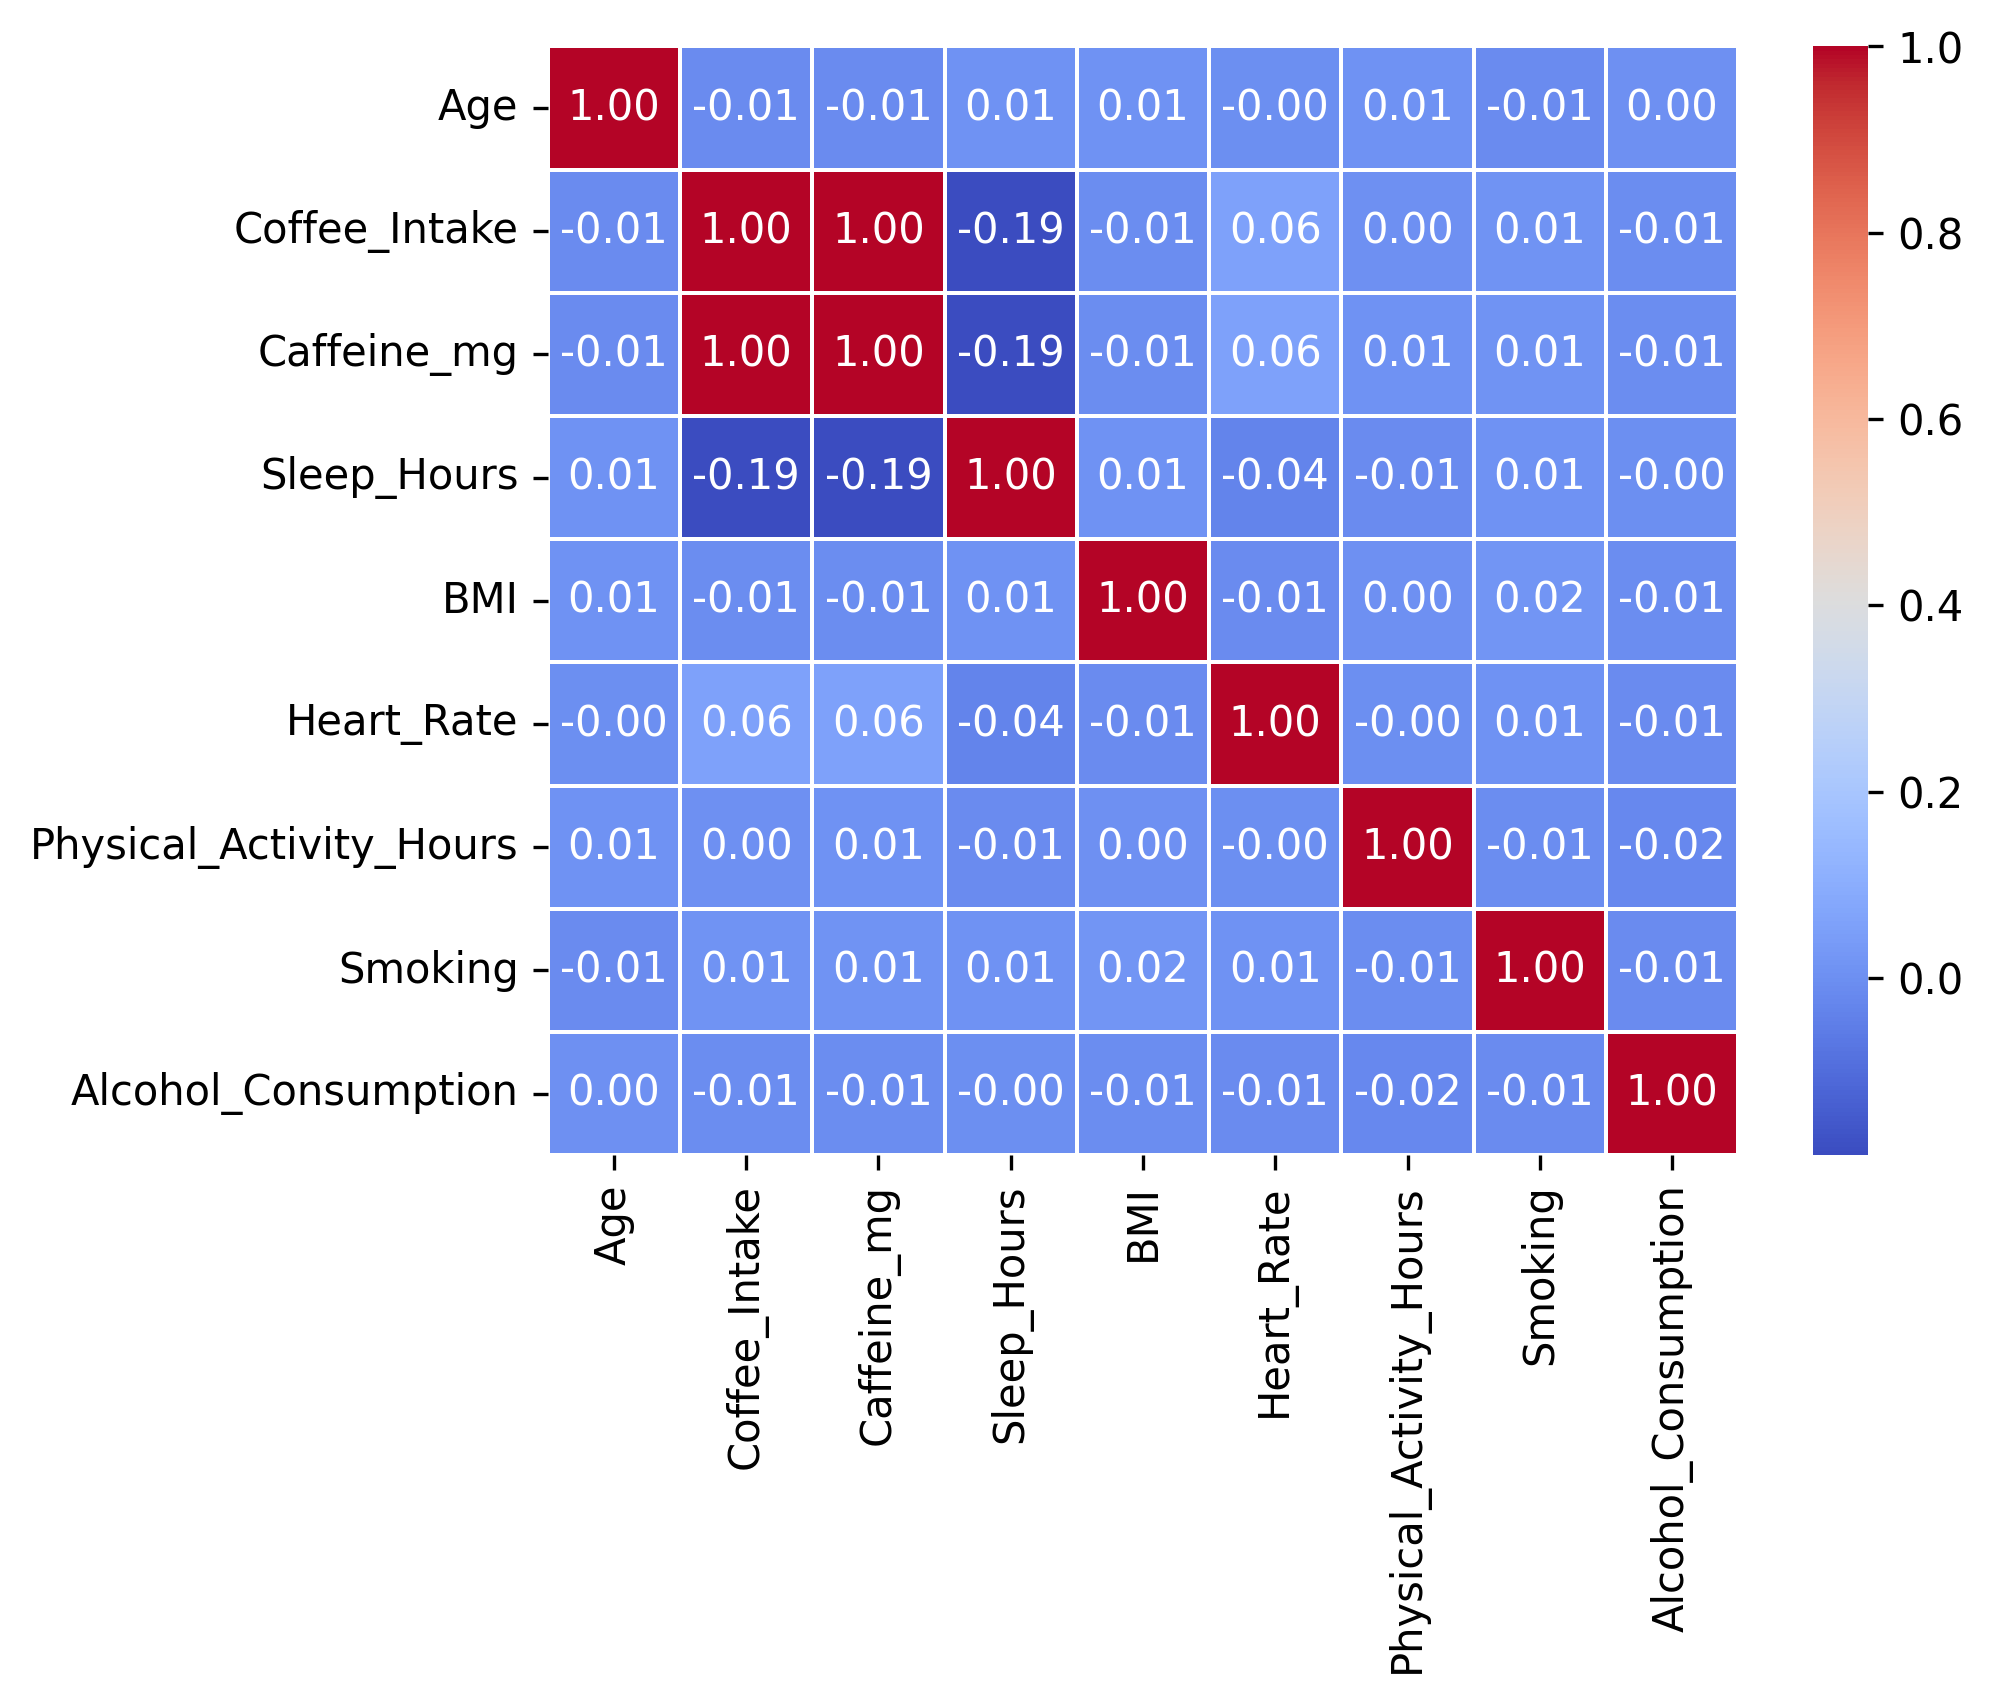

In [9]:
# Heatmap based on this new dataframe.

heat = sns.heatmap(heat_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

The very clearly diagonal red cells are matching to themselves and can be ignored.

The caffeine and coffee_intake correlation is perfect, suggesting there are no decaf drinkers included.

The weak negative correlation with sleep hours isn't surprising, but cool to see. It does make me wonder about sleep quality though; could change the values to numbers and filter them for further analysis.

# Scatterplot(s)

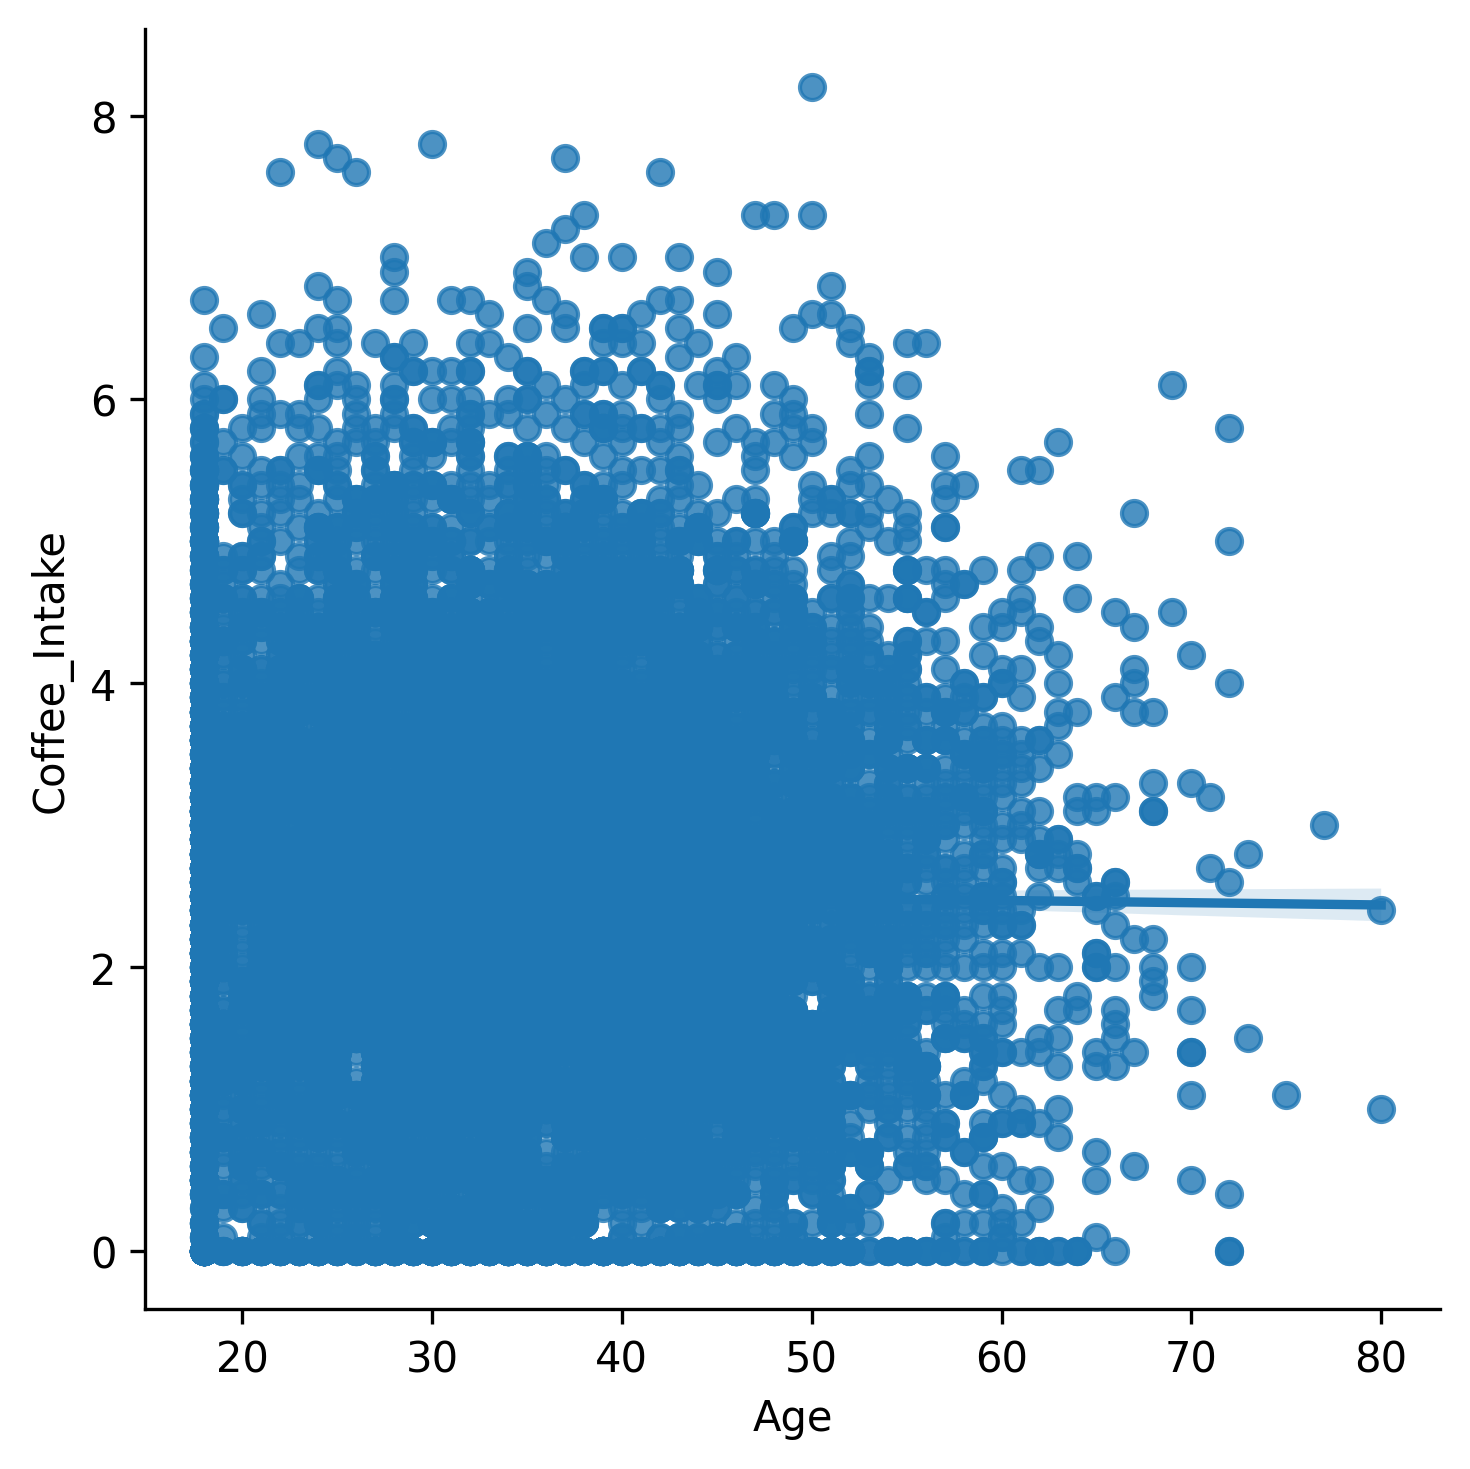

In [10]:
scatter = sns.lmplot(x = 'Age', y = 'Coffee_Intake', data = df)

There does not seem to be any correlation between age and coffee intake. There are definitely some groupings along the axes indicating that this group is not all coffee drinkers. You can also see that coffee intake does slightly decline with age past 60. I'm guessing that's just a lack of data in those age ranges either because of collection (synthetic in this case) or people dying before data could be collected again.

# Pair plot

Fortunately, pair plots are crazy easy to make using seaborn

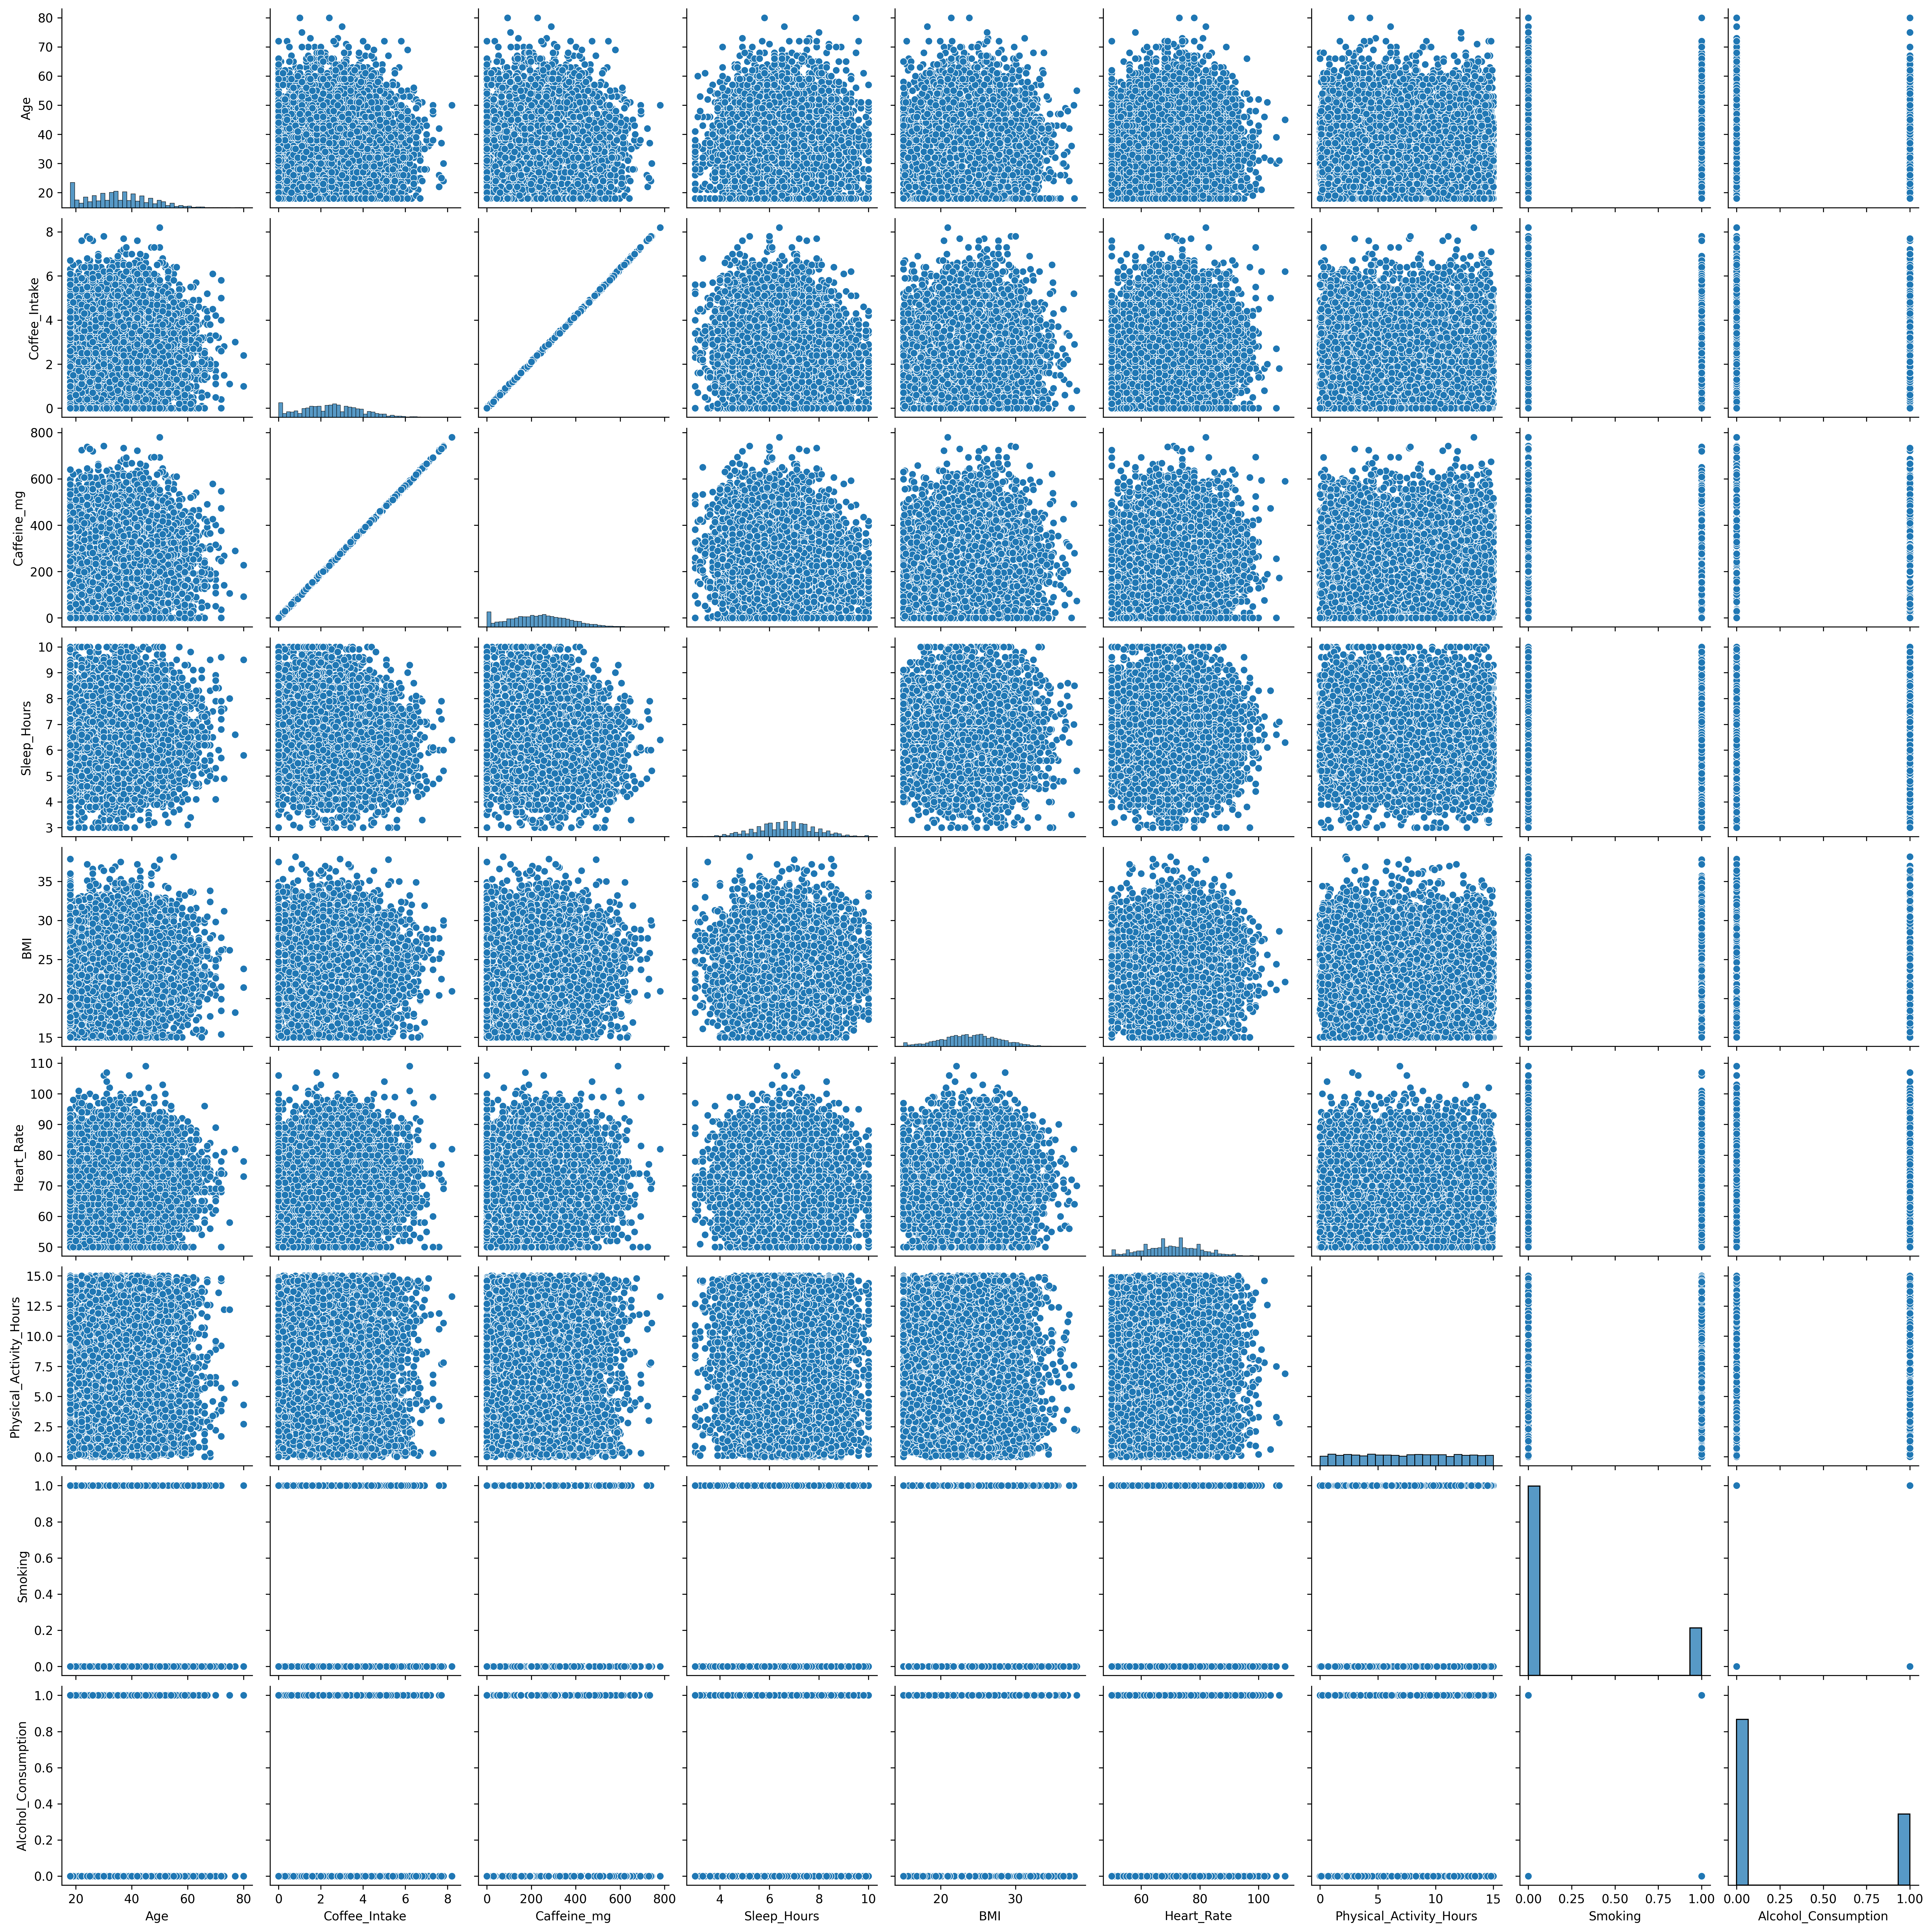

In [11]:
pair_plot = sns.pairplot(df)

Well, this synthetic data did a fantastic job of being as close to random as possible, haha.

The binary values are easy to see. Glad to see there are more non-smokers and non-alcohol consumption users from an ethical standpoint.

A little disappointing to see a fairly standard bell curve in most of the histograms. The physical activity hours seems to be evenly distributed though so that would lead me to believe that was the primary numeric variable they wanted to control. However, the lack of the health issues column points out another instance of wishing the nominal values were numerical for more complete analysis.

# Categorical plot

In [12]:
# First, we need to setup our ranges

df.loc[df['Heart_Rate'] < 60, 'Resting_Heart_Rate'] = 'Low HR'
df.loc[(df['Heart_Rate'] >= 60) & (df['Heart_Rate'] < 100), 'Resting_Heart_Rate'] = 'Average HR'
df.loc[df['Heart_Rate'] >= 100, 'Resting_Heart_Rate'] = 'High HR'

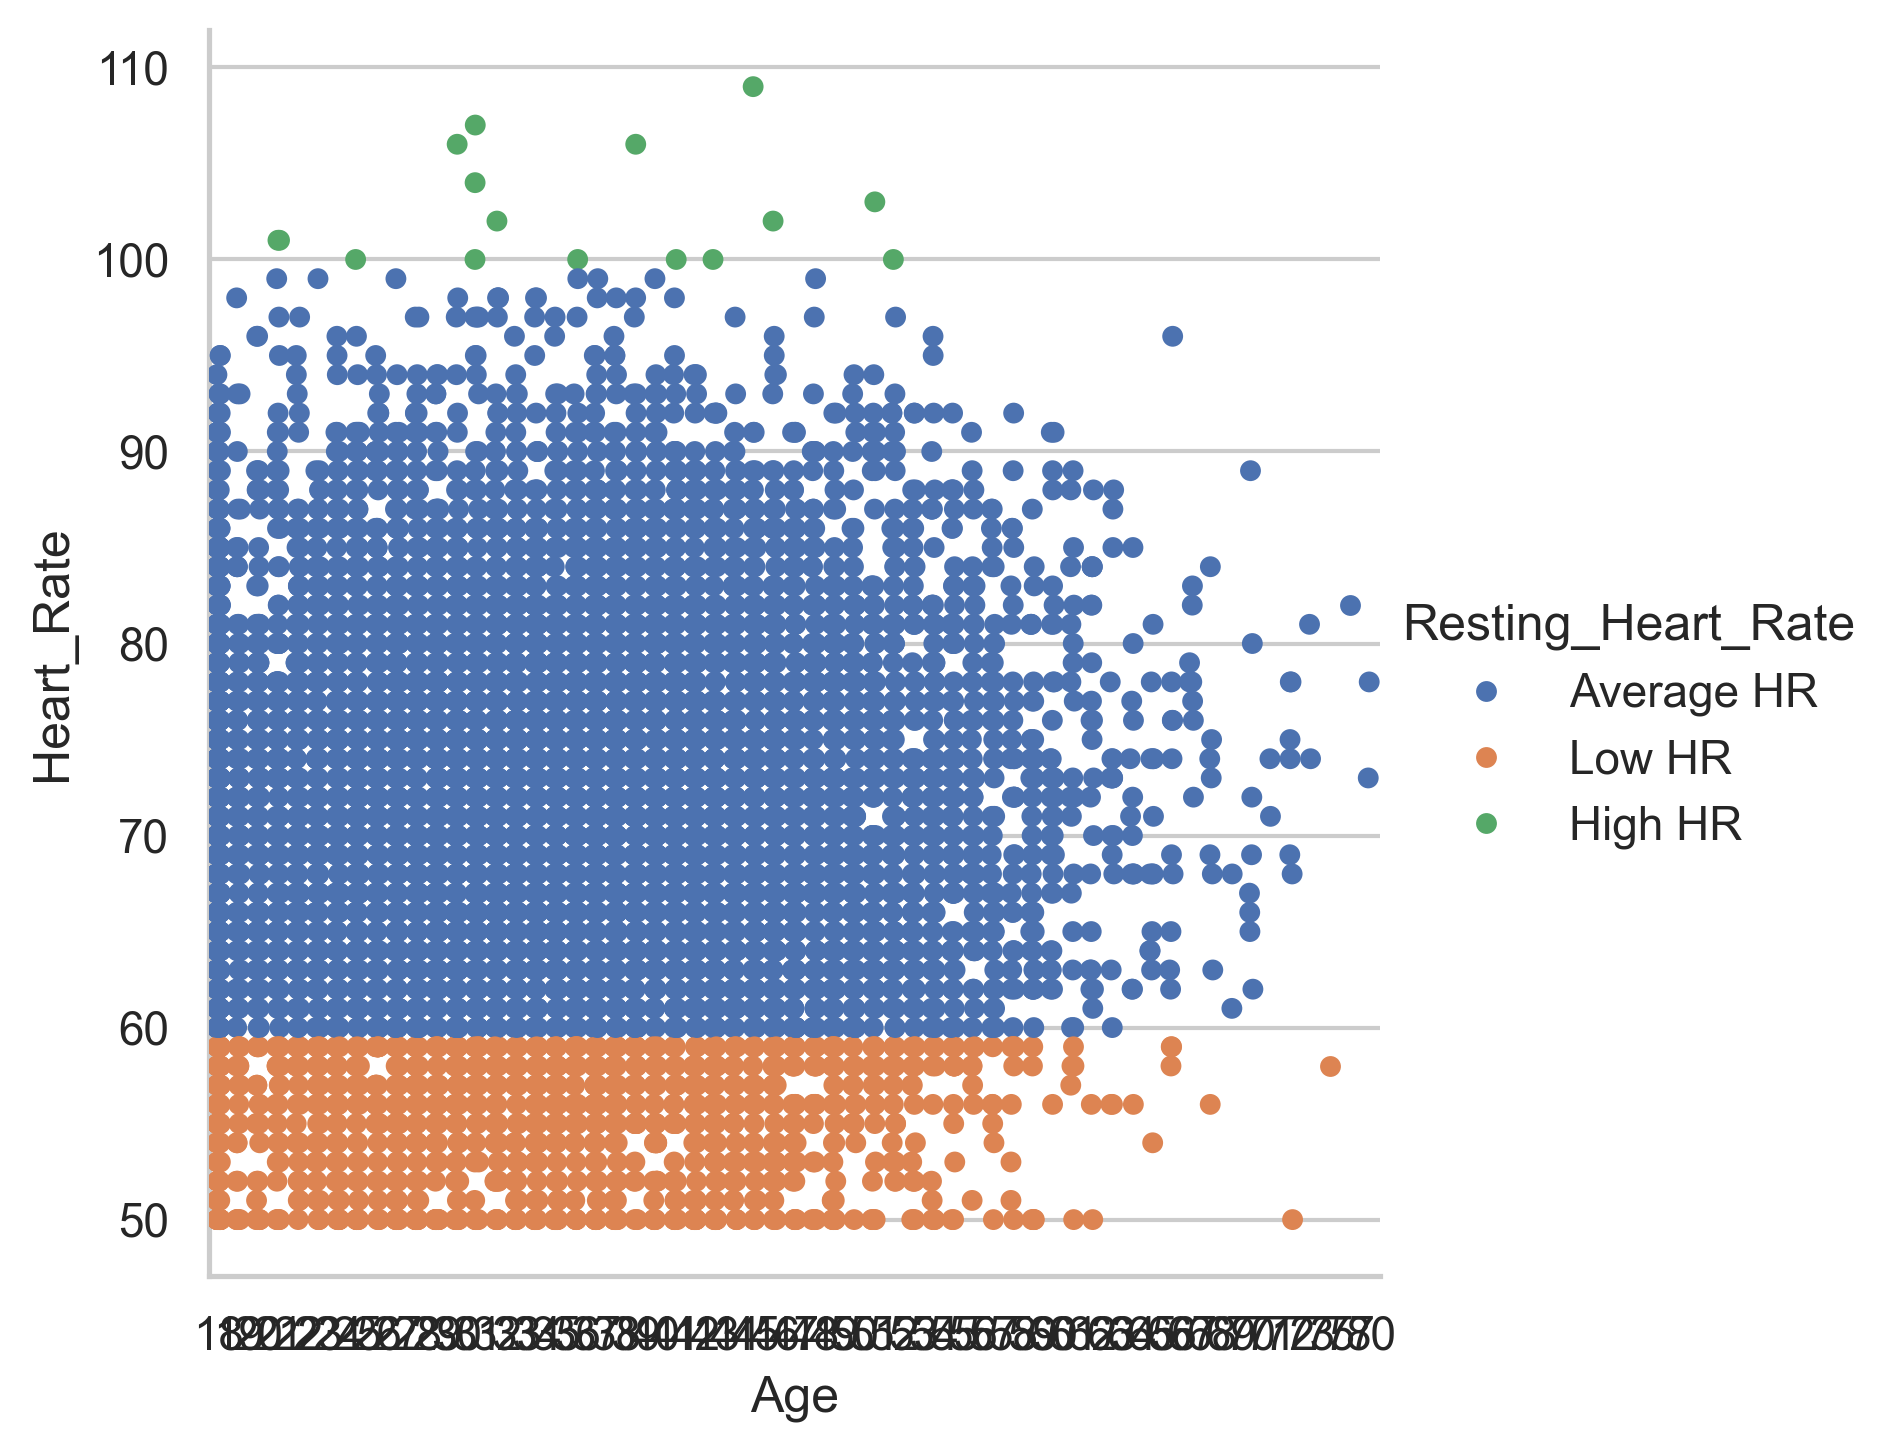

In [13]:
# Now we can create our category plot

sns.set(style="whitegrid")
catplot1 = sns.catplot(x="Age", y="Heart_Rate", hue="Resting_Heart_Rate", data=df)

First thing I noticed is the age numbers are too squished together. It would be nice to have a wider plot or similar with fewer numbers (maybe only decades instead)

Learning that resting heart rate is usually between 60 and 100 was a little surprising, but that determined how I sorted data.

The majority of data is average, but there is a large majority that are low HR too. Perhaps they are also in the higher hours of physical activity?

Higher age does seem to suggest that the higher heart rates are less common with a couple outliers, meaning as you get older your resting heart rate goes down (albeit slightly). But without removing outliers I'd have to assume the heatmap is correct as having no correlation.

# Questions revisited

Coffee does have a weak correlation to sleep hours. I'd like to see how it stacks up against sleep quality though.

All ages drink coffee fairly uniformly. There's a very slight bias toward older people drinking less coffee.

Didn't break down analysis by gender, Country, Sleep Quality, Stress Level, Health Issues, Occupation, Smoking, or Alcohol Consumption because those are non-numeric at the moment. Further data wrangling is necessary to see those results.

We don't have variables to account for other benefits, methods of coffee preparation, time of day, bean type, additives, etc so many questions can be disregarded if we plan to only use this data.

# Hypotheses?

Does coffee intake impact sleep hours and quality?

Does more activity level (hours) affect coffee intake?

In [14]:
# Export changes

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Coffee_Wrangled.csv'))

# Export charts

In [15]:
heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Coffee_heatmap.png'), bbox_inches='tight')
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Coffee_age_intake_scatter.png'), bbox_inches='tight')
pair_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Coffee_pairplot.png'), bbox_inches='tight')
catplot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Coffee_heart_rate_catplot.png'), bbox_inches='tight')